Mean Squared Error: 0.012
R^2 Score: 0.973


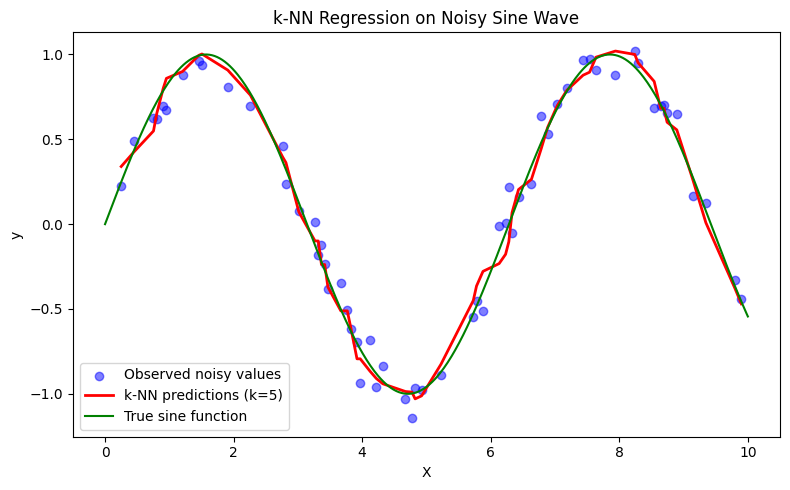

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------
# Generate synthetic dataset
# -------------------------
np.random.seed(42)
x_dense = np.linspace(0, 10, 500)


X = np.linspace(0, 10, 200).reshape(-1, 1)        # 200 evenly spaced points
y = np.sin(X).ravel() + 0.1 * np.random.randn(200)  # sin(x) + Gaussian noise

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -------------------------
# Train k-NN regressor
# -------------------------
k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# -------------------------
# Evaluate performance
# -------------------------
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

# -------------------------
# Plot results
# -------------------------
# Sort test set for smooth prediction line
X_test_sorted, y_pred_sorted = zip(*sorted(zip(X_test.ravel(), y_pred)))

plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Observed noisy values')
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label=f'k-NN predictions (k={k})')

# Optional: plot true sine function (without noise)
x_dense = np.linspace(0, 10, 500)
plt.plot(x_dense, np.sin(x_dense), color='green', label='True sine function')

plt.xlabel('X')
plt.ylabel('y')
plt.title('k-NN Regression on Noisy Sine Wave')
plt.legend()
plt.tight_layout()

# Save figure
plt.savefig('img/knn_noisy_sine.png', dpi=300)

plt.show()